<a href="https://colab.research.google.com/github/abrishwon21/ML_in_Python/blob/master/SVC_wine_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.datasets import load_wine
win=load_wine()
wine=pd.DataFrame(win['data'],columns=win['feature_names']);
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [2]:
subwin=wine.iloc[:,:2]
y=win['target']
subwin

,alcohol,malic_acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59
...,...,...
173,13.71,5.65
174,13.40,3.91
175,13.27,4.28
176,13.17,2.59


In [3]:
#checking dimension
subwin.shape

(178, 2)

In [4]:
#now creating svm model
from sklearn.svm import SVC
model=SVC(kernel='linear',C=1)
model.fit(subwin,y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [5]:
import numpy as np

xmin,xmax=subwin.iloc[:,0].min()-1,subwin.iloc[:,0].max()+1
ymin,ymax=subwin.iloc[:,1].min()-1,subwin.iloc[:,1].max()+1
h=(xmax/xmin)/100
xx,yy=np.meshgrid(np.arange(xmin,xmax),np.arange(ymin,ymax))



In [8]:
win1=win.data[:,:2]
win1[:5]

array([[14.23,  1.71],
       [13.2 ,  1.78],
       [13.16,  2.36],
       [14.37,  1.95],
       [13.24,  2.59]])

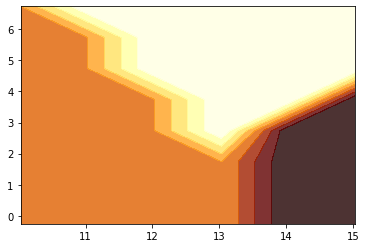

In [9]:
plt.subplot(1,1,1)
z=model.predict(np.c_[xx.ravel(),yy.ravel()])
#reshape z in xx shape
z=z.reshape(xx.shape)
plt.contourf(xx,yy,z,cmap=plt.cm.afmhot,alpha=0.8)

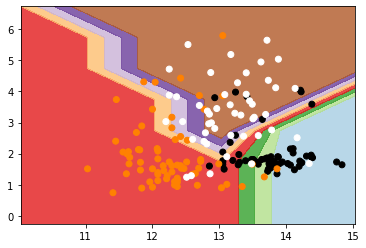

In [10]:
plt.contourf(xx,yy,z,cmap=plt.cm.Paired,alpha=0.8)
plt.scatter(win1[:,0],win1[:,1],c=y,cmap=plt.cm.afmhot)

In [12]:
from sklearn.model_selection import train_test_split as trts
xtrain,xtest,ytrain,ytest=trts(win['data'],win['target'],test_size=0.3,random_state=1)

In [13]:
#now let's see by classifying it again
model=SVC(kernel='linear',C=1)
model.fit(xtrain,ytrain)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
#now predict
pv=model.predict(xtest)

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix
ac=accuracy_score(ytest,pv)
ac

0.9629629629629629

In [16]:
cm=confusion_matrix(ytest,pv)
cm

array([[23,  0,  0],
       [ 1, 18,  0],
       [ 0,  1, 11]])

<BarContainer object of 4 artists>

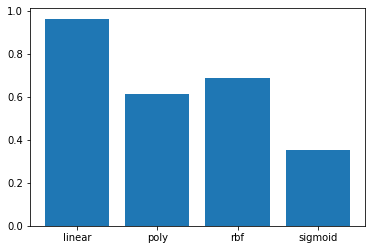

In [17]:
ac1=[]
l=['linear','poly','rbf','sigmoid']
for i in range(len(l)):
  model=SVC(kernel=l[i],C=1)
  model.fit(xtrain,ytrain)
  pv=model.predict(xtest)
  accuracy=accuracy_score(ytest,pv)
  ac1.append(accuracy)
plt.bar(l,ac1)

In [61]:


#we'll be working in KNN 

from sklearn.neighbors import KNeighborsClassifier as kn
knn_model=kn(n_neighbors=5)
knn_model.fit(xtrain,ytrain)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [62]:
#let's predict the target using xtest
predict_targ=knn_model.predict(xtest)
print("The predicted value is ",predict_targ)

The predicted value is  [1 1 2 2 0 1 2 0 2 1 0 2 1 0 2 1 1 0 1 0 0 1 2 0 0 1 0 0 0 1 1 1 1 0 2 1 1
 2 1 0 0 1 2 0 0 0 0 0 0 0 1 2 2 0]


In [63]:
#now let's analys it's accuracy
pred_accuracy=accuracy_score(ytest,predict_targ)
print("The accuracy of of prediction is:")
print("_______________________________")
pred_accuracy

The accuracy of of prediction is:
_______________________________


0.7037037037037037

In [65]:
#now confussion matrixes
cmatr=confusion_matrix(ytest,predict_targ)
cmatr

array([[21,  0,  2],
       [ 2, 12,  5],
       [ 0,  7,  5]])